DATA PREPROCESSING : CONVERTING THE RAW DATA INTO SUITABLE FORM

In [830]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [975]:
df = pd.read_csv("./diamonds_with_null.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [832]:
x = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table']].values
x

array([[0.23, 'Ideal', 'E', 'SI2', 61.5, 55.0],
       [0.21, 'Premium', 'E', 'SI1', 59.8, 61.0],
       [0.23, 'Good', 'E', 'VS1', 56.9, 65.0],
       ...,
       [0.7, 'Very Good', 'D', 'SI1', 62.8, 60.0],
       [0.86, 'Premium', 'H', 'SI2', 61.0, 58.0],
       [nan, 'Ideal', 'D', 'SI2', 62.2, 55.0]], dtype=object)

In [833]:
y = df[['price']].values
y

array([[ 326.],
       [ 326.],
       [ 327.],
       ...,
       [2757.],
       [2757.],
       [2757.]])

In [834]:
df.shape
df.value_counts()
df.isnull().sum()

Unnamed: 0       0
carat         2731
cut              0
color            0
clarity          0
depth            0
table            0
price         2707
x                0
y                0
z                0
dtype: int64

In [835]:
print("Number of duplicates:", df.duplicated().sum())

Number of duplicates: 0


In [836]:
df.isnull().mean()*100

Unnamed: 0    0.000000
carat         5.063033
cut           0.000000
color         0.000000
clarity       0.000000
depth         0.000000
table         0.000000
price         5.018539
x             0.000000
y             0.000000
z             0.000000
dtype: float64

In [837]:
cols = [var for var in df.columns if df[var].isnull().mean()>0.05]
cols

['carat', 'price']

In [838]:
df[cols].sample(5)

,carat,price
879,1.0,2873.0
19489,1.3,8124.0
23701,0.3,631.0
16707,0.3,421.0
49442,0.7,2110.0


In [839]:
new_df = df[cols].dropna()
df.shape, new_df.shape
new_df

,carat,price
0,0.23,326.0
1,0.21,326.0
2,0.23,327.0
3,0.29,334.0
4,0.31,335.0
...,...,...
53933,0.70,2757.0
53934,0.72,2757.0
53935,0.72,2757.0
53937,0.70,2757.0


In [840]:
df.groupby('cut').size()

cut
Fair          1610
Good          4906
Ideal        21551
Premium      13791
Very Good    12082
dtype: int64

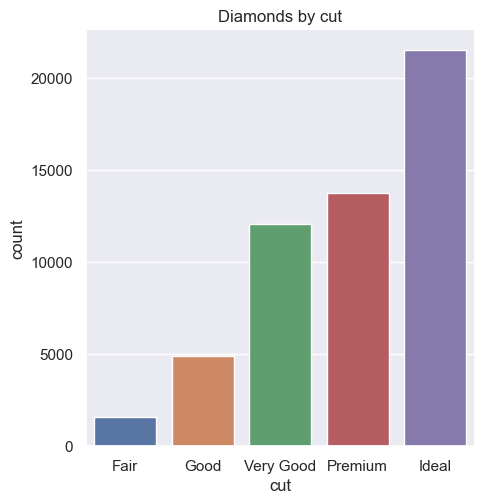

In [841]:
category_lst = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
sns.catplot(data=df, x='cut', kind='count', order=category_lst)
plt.title('Diamonds by cut')
plt.show()

In [842]:
df.groupby(['cut', 'color']).size()

cut        color
Fair       D         163
           E         224
           F         312
           G         314
           H         303
           I         175
           J         119
Good       D         662
           E         933
           F         909
           G         871
           H         702
           I         522
           J         307
Ideal      D        2834
           E        3903
           F        3826
           G        4884
           H        3115
           I        2093
           J         896
Premium    D        1603
           E        2337
           F        2331
           G        2924
           H        2360
           I        1428
           J         808
Very Good  D        1513
           E        2400
           F        2164
           G        2299
           H        1824
           I        1204
           J         678
dtype: int64

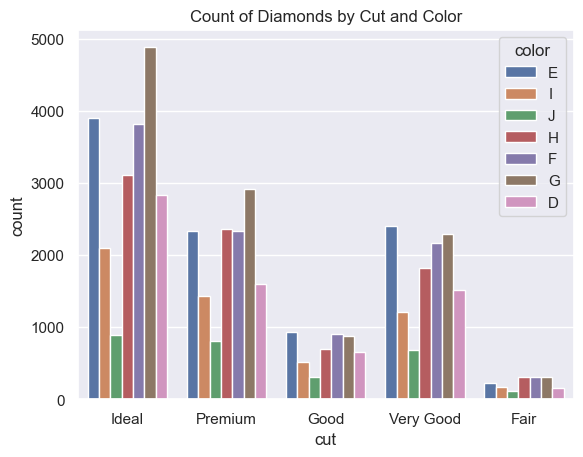

In [843]:
sns.countplot(data=df, x='cut', hue='color')
plt.title("Count of Diamonds by Cut and Color")
plt.show()

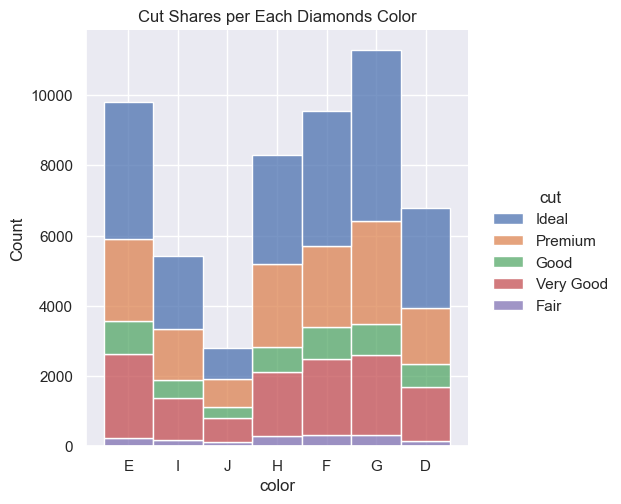

In [844]:
sns.displot(data=df, x='color', hue='cut', multiple='stack', binwidth=2)
plt.title('Cut Shares per Each Diamonds Color')
plt.show()

In [980]:
df.groupby('cut')['price'].agg('median')

cut
Fair         3292.0
Good         3070.0
Ideal        1803.0
Premium      3167.0
Very Good    2649.0
Name: price, dtype: float64

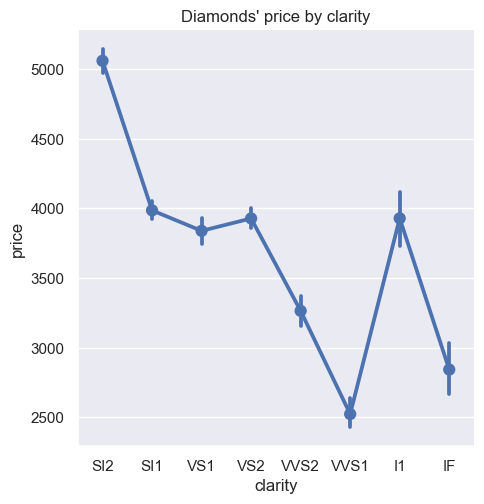

In [846]:
sns.catplot(data=df, x='clarity', y='price', kind='point')
plt.title("Diamonds' price by clarity")
plt.show()

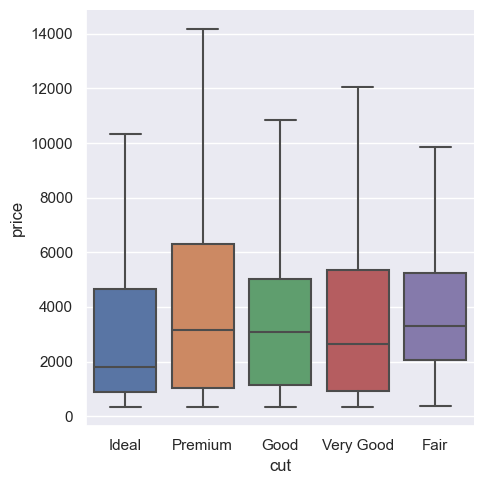

In [978]:
sns.catplot(data=df, x='cut', y='price', kind='box', sym='')
plt.show()

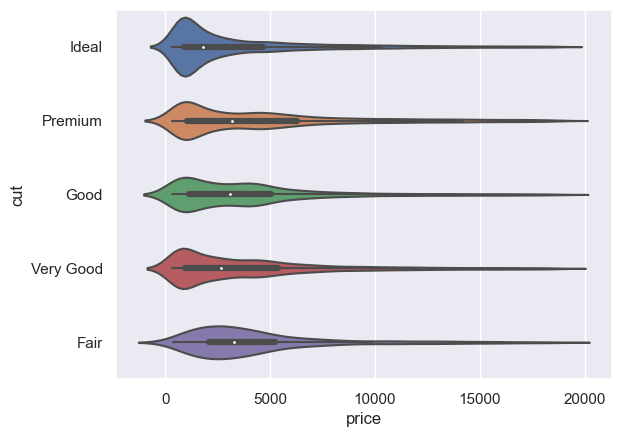

In [848]:
sns.violinplot(data=df, y='cut', x='price', col='clarity')
plt.show()

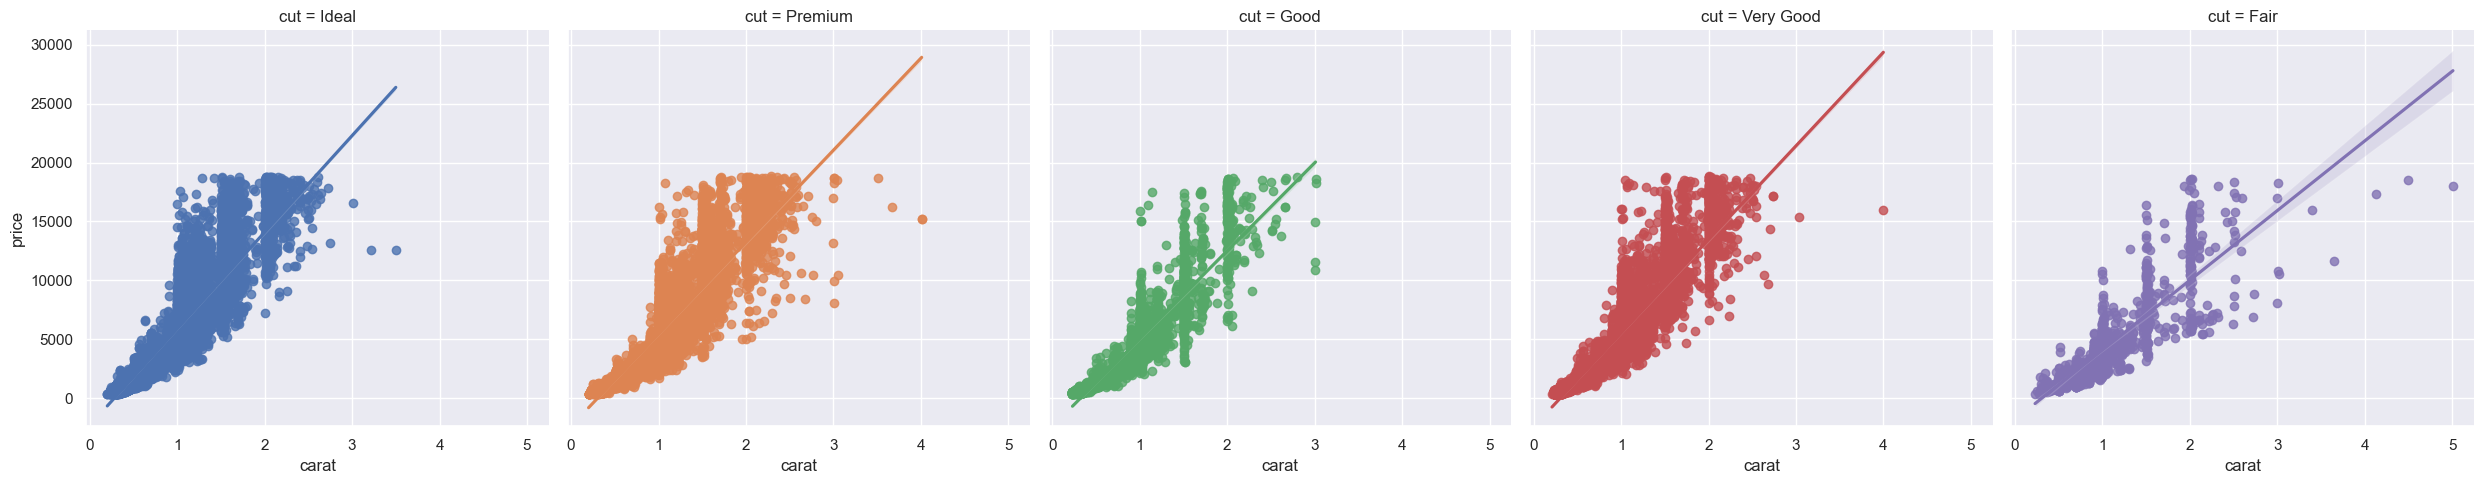

In [849]:
sns.lmplot(data=df, x='carat', y='price', hue='cut', col='cut')
plt.show()

In [850]:
corr = df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']].corr()
corr

,carat,depth,table,price,x,y,z
carat,1.000000,0.027317,0.182170,0.921747,0.974945,0.950584,0.952547
depth,0.027317,1.000000,-0.295779,-0.010840,-0.025289,-0.029341,0.094924
table,0.182170,-0.295779,1.000000,0.128138,0.195344,0.183760,0.150929
price,0.921747,-0.010840,0.128138,1.000000,0.884066,0.880987,0.860184
x,0.974945,-0.025289,0.195344,0.884066,1.000000,0.974701,0.970772
y,0.950584,-0.029341,0.183760,0.880987,0.974701,1.000000,0.952006
z,0.952547,0.094924,0.150929,0.860184,0.970772,0.952006,1.000000


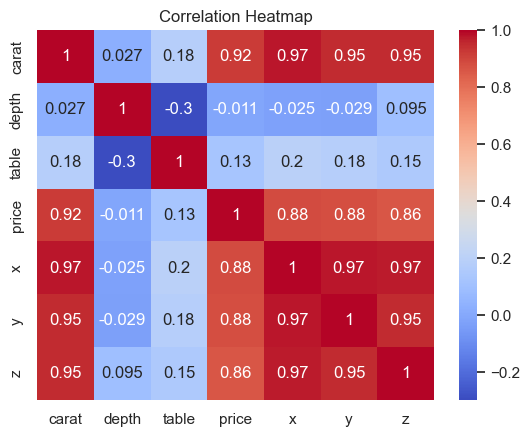

In [851]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

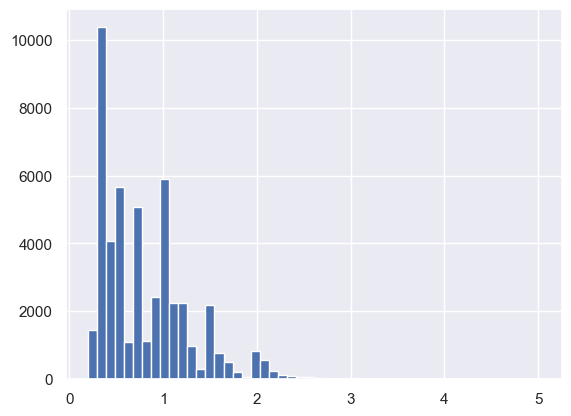

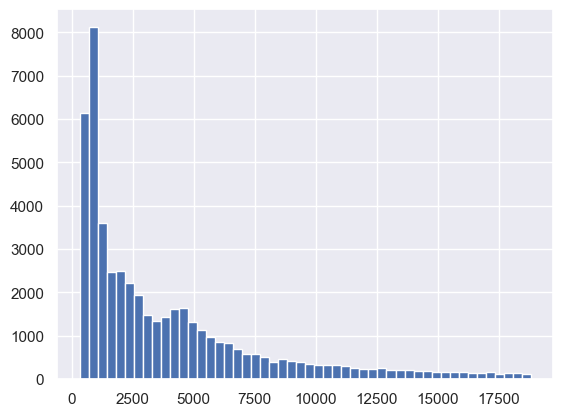

In [852]:
fg, ax0 = plt.subplots(nrows=1, ncols=1)
ax0.hist(new_df['carat'], bins=50)

fg, ax1 = plt.subplots(nrows=1, ncols=1)
ax1.hist(new_df['price'], bins=50)

plt.show()

<Axes: >

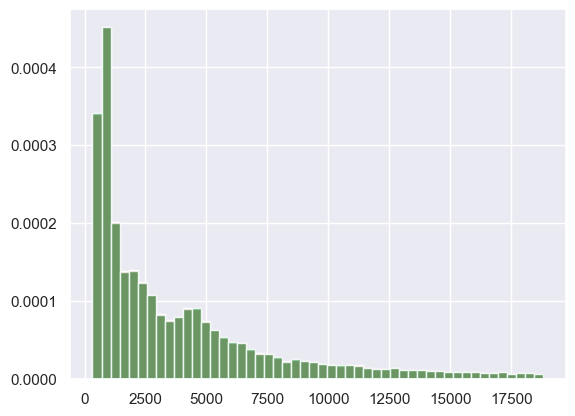

In [853]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['price'].hist(bins=50, ax=ax, density=True, color='r')
new_df['price'].hist(bins=50, ax=ax, density=True, color='g', alpha=0.8)

<Axes: ylabel='Density'>

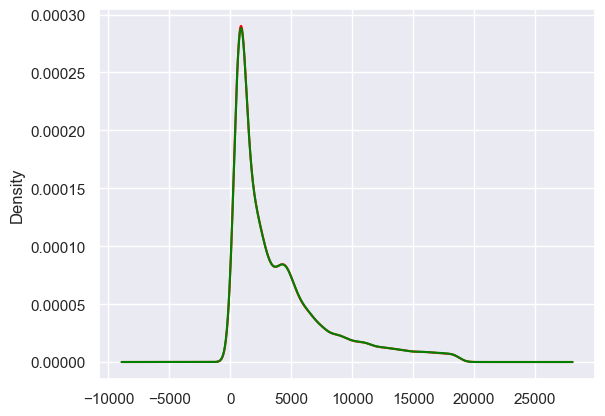

In [854]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['price'].plot(kind='kde', color='red')

new_df['price'].plot(kind='kde', color='green')

<Axes: >

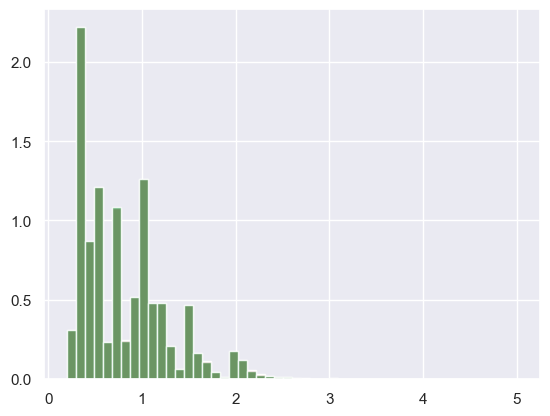

In [855]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['carat'].hist(bins=50, ax=ax, density=True, color='r')

new_df['carat'].hist(bins=50, ax=ax, density=True, color='g', alpha=0.8)

<Axes: ylabel='Density'>

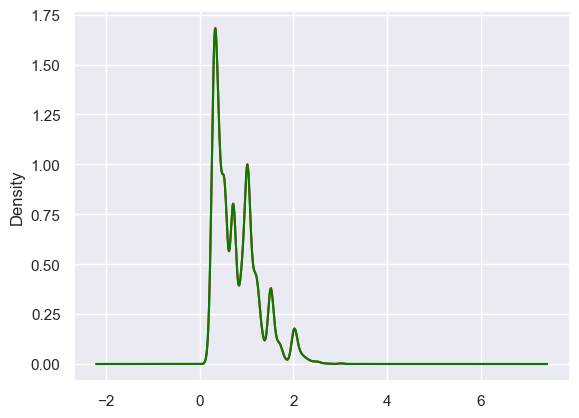

In [856]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['carat'].plot(kind='kde',ax=ax, color='red')

new_df['carat'].plot(kind='kde', ax=ax, color='green')


In [857]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [858]:
df = pd.read_csv('./diamonds_with_null.csv')

In [859]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [860]:
df.isnull().mean()

Unnamed: 0    0.000000
carat         0.050630
cut           0.000000
color         0.000000
clarity       0.000000
depth         0.000000
table         0.000000
price         0.050185
x             0.000000
y             0.000000
z             0.000000
dtype: float64

In [861]:
x = df.drop(columns=['cut', 'color', 'clarity'])
y = df[['cut', 'color', 'clarity']]

In [862]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
x_train.shape, x_test.shape

((43152, 8), (10788, 8))

In [863]:
mean_age = x_train['carat'].mean()
median_age = x_train['carat'].median()

mean_fare = x_train['price'].mean()
median_fare = x_train['price'].median()

x_train['carat_median'] = x_train['carat'].fillna(median_age)
x_train['carat_mean'] = x_train['carat'].fillna(mean_age)

x_train['price_median'] = x_train['price'].fillna(median_fare)
x_train['price_mean'] = x_train['price'].fillna(mean_fare)

In [864]:
x_train

,Unnamed: 0,carat,depth,table,price,x,y,z,carat_median,carat_mean,price_median,price_mean
34837,34838,0.30,60.8,58.0,878.0,4.38,4.34,2.65,0.30,0.30,878.0,878.0
19858,19859,1.06,61.2,57.0,8415.0,6.52,6.56,4.00,1.06,1.06,8415.0,8415.0
9544,9545,1.00,63.3,56.0,4620.0,6.35,6.38,4.03,1.00,1.00,4620.0,4620.0
44752,44753,0.51,62.2,58.0,1619.0,5.13,5.06,3.17,0.51,0.51,1619.0,1619.0
45717,45718,0.56,60.9,56.0,1698.0,5.35,5.32,3.25,0.56,0.56,1698.0,1698.0
...,...,...,...,...,...,...,...,...,...,...,...,...
44566,44567,0.52,63.3,58.0,1605.0,5.15,5.12,3.25,0.52,0.52,1605.0,1605.0
30280,30281,0.30,61.0,57.0,447.0,4.31,4.34,2.64,0.30,0.30,447.0,447.0
6637,6638,0.90,61.4,58.0,4089.0,6.22,6.25,3.83,0.90,0.90,4089.0,4089.0
35343,35344,0.42,63.2,58.0,898.0,4.79,4.77,3.02,0.42,0.42,898.0,898.0


In [865]:
print('Carat variable variance', x_train['carat'].var())
print('Variance after median imputation', x_train['carat_median'].var())
print('Carat after mean variance', x_train['carat_mean'].var())

print('price variable variance', x_train['price'].var())
print('price after mean variance', x_train['price_median'].var())
print('price after mean variance', x_train['price_mean'].var())


Carat variable variance 0.2258988703368793
Variance after median imputation 0.2150442822392315
Carat after mean variance 0.21458586579937153
price variable variance 15903850.527695445
price after mean variance 15213610.595164616
price after mean variance 15101489.456137592


categorical data

In [866]:
import pandas as pd
import seaborn as sns

In [867]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


<Axes: ylabel='count'>

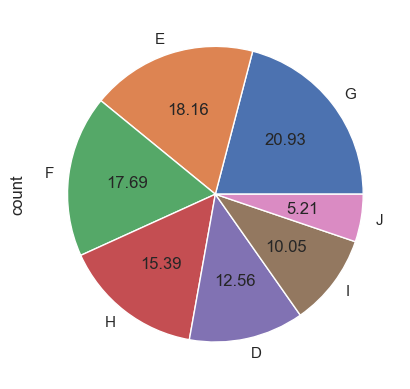

In [868]:
df['color'].value_counts().plot(kind='pie',autopct='%.2f')

(array([32947., 10699.,  3915.,  2175.,  1497.]),
 array([  326. ,  4025.4,  7724.8, 11424.2, 15123.6, 18823. ]),
 <BarContainer object of 5 artists>)

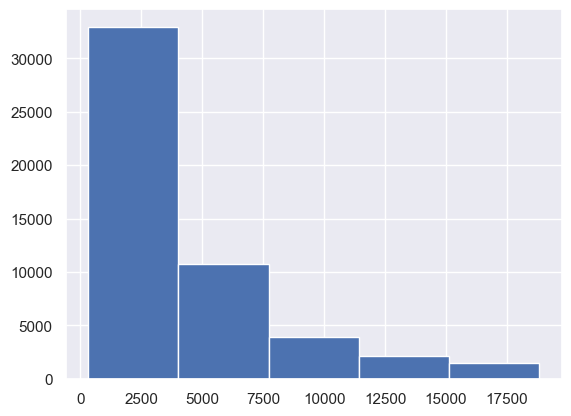

In [869]:
plt.hist(df['price'],bins=5)

C:\Users\adity\AppData\Local\Temp\ipykernel_13492\444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

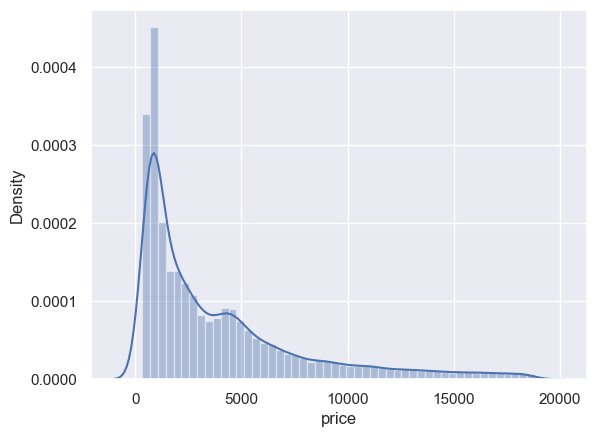

In [870]:
sns.distplot(df['price'])

<Axes: >

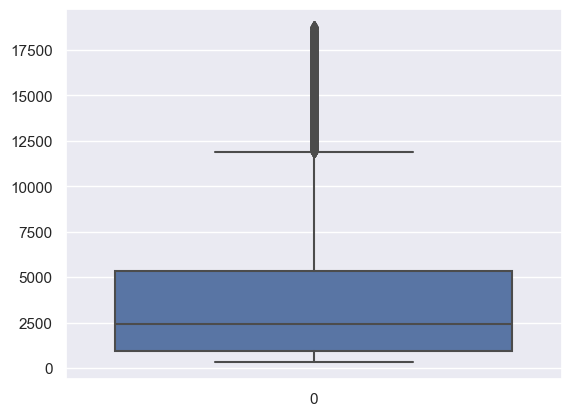

In [871]:
sns.boxplot(df['price'])

Standardization

In [872]:
df = pd.read_csv('./diamonds.csv', usecols=['carat', 'price', 'table'])
df

,carat,table,price
0,0.23,55.0,326
1,0.21,61.0,326
2,0.23,65.0,327
3,0.29,58.0,334
4,0.31,58.0,335
...,...,...,...
53935,0.72,57.0,2757
53936,0.72,55.0,2757
53937,0.70,60.0,2757
53938,0.86,58.0,2757


In [873]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('table', axis=1),
                                                    df['table'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((37758, 2), (16182, 2))

Standard Scaler

In [874]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [875]:
X_train_scaled

array([[ 0.44581318,  0.64455716],
       [ 1.56235557,  2.06521844],
       [ 0.74074891,  0.31590232],
       ...,
       [-1.00779861, -0.85933327],
       [-0.81819707, -0.62719416],
       [ 0.23514481, -0.17219147]])

In [876]:
scaler.mean_

array([7.98381535e-01, 3.93286962e+03])

In [877]:
X_train

,carat,price
16259,1.01,6504
24005,1.54,12171
12211,1.15,5193
37918,0.41,1007
181,0.54,2776
...,...,...
45891,0.52,1720
52416,0.70,2512
42613,0.32,505
43567,0.41,1431


In [878]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [879]:
np.round(X_train.describe(), 1)

,carat,price
count,37758.0,37758.0
mean,0.8,3932.9
std,0.5,3989.0
min,0.2,327.0
25%,0.4,952.0
50%,0.7,2396.5
75%,1.0,5335.0
max,5.0,18823.0


In [880]:
np.round(X_train_scaled.describe(), 1)

,carat,price
count,37758.0,37758.0
mean,-0.0,-0.0
std,1.0,1.0
min,-1.3,-0.9
25%,-0.8,-0.7
50%,-0.2,-0.4
75%,0.5,0.4
max,8.9,3.7


What has happened due to scaling

KeyError: 'carat'

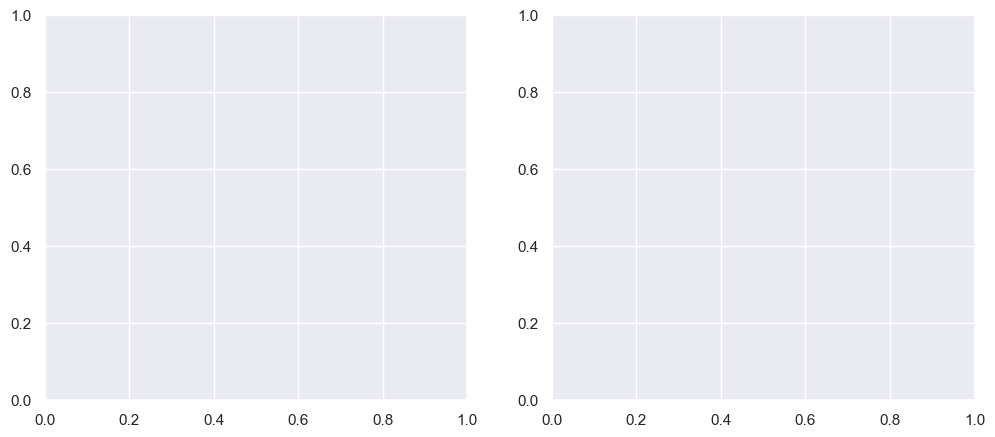

In [982]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
X_train_scaled['carat'].plot(kind='kde',ax=ax, color='red')
X_train['carat'].plot(kind='kde',ax=ax, color='green')

# new_df['carat'].plot(kind='kde', ax=ax, color='green')ax1.set_title("Before Scaling")
# ax2.kde(X_train_scaled['carat'], X_train_scaled['price'],color='red')
ax2.set_title("After Scaling")
plt.show()

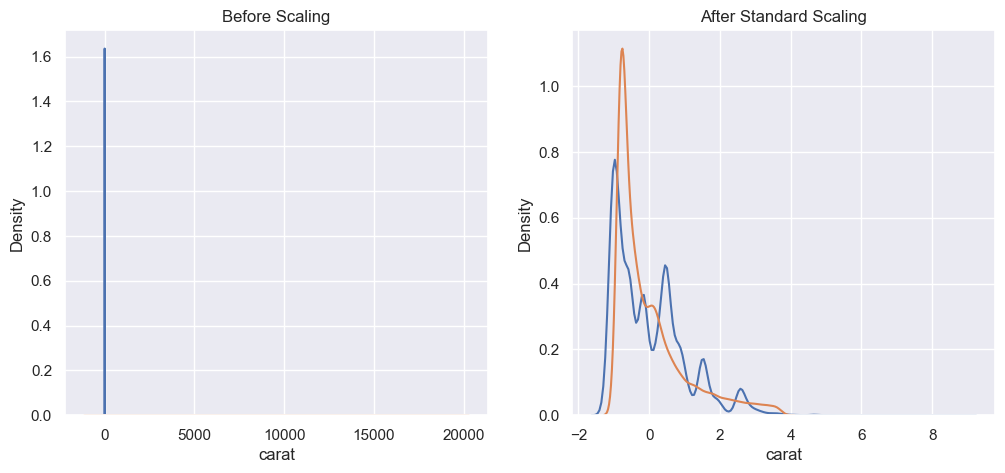

In [882]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['carat'], ax=ax1)
sns.kdeplot(X_train['price'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['carat'], ax=ax2)
sns.kdeplot(X_train_scaled['price'], ax=ax2)
plt.show()

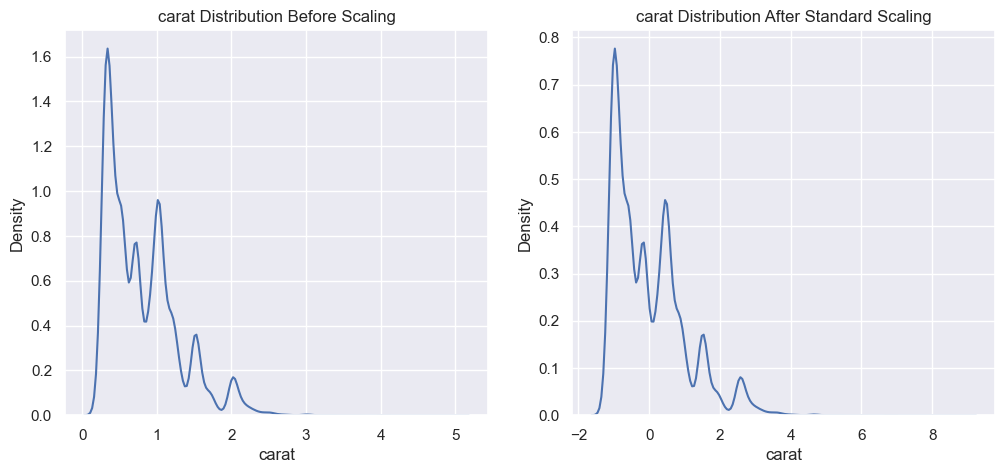

In [883]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('carat Distribution Before Scaling')
sns.kdeplot(X_train['carat'], ax=ax1)

# after scaling
ax2.set_title('carat Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['carat'], ax=ax2)
plt.show()

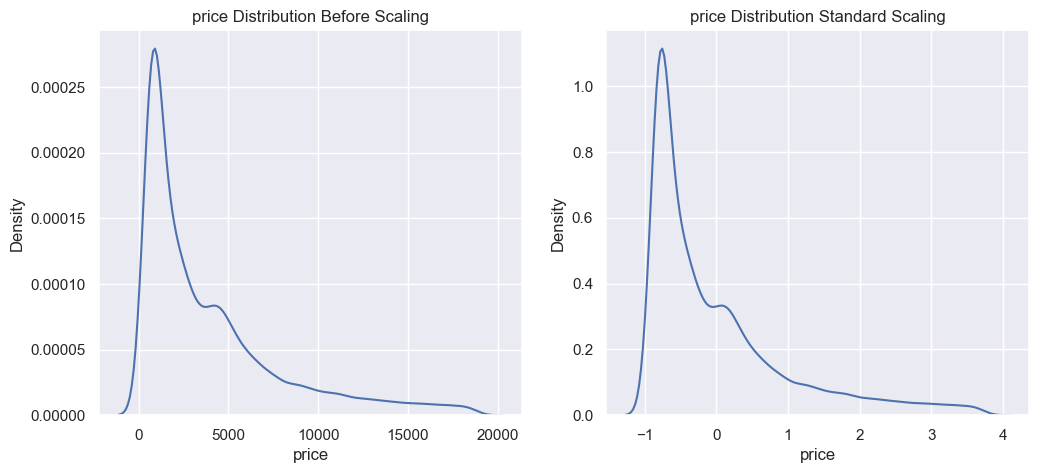

In [884]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('price Distribution Before Scaling')
sns.kdeplot(X_train['price'], ax=ax1)

# after scaling
ax2.set_title('price Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['price'], ax=ax2)
plt.show()

In [885]:
df1 = pd.read_csv('./diamonds.csv')
df1


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [886]:
catcol = df1.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df1, columns=catcol, drop_first=True)
columns_to_remove = ['Unnamed: 0', 'x', 'y', 'z']
df_encoded = df_encoded.drop(columns=columns_to_remove, axis=1)

In [887]:
df_encoded

,carat,depth,table,price,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,False,True,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,False,False,True,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,False,False,True,False,False,False,...,False,True,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,True,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
53936,0.72,63.1,55.0,2757,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
53937,0.70,62.8,60.0,2757,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
53938,0.86,61.0,58.0,2757,False,False,True,False,False,False,...,True,False,False,False,False,True,False,False,False,False


In [888]:
df_encoded = df_encoded.replace({True:1, False:0})
df_encoded

,carat,depth,table,price,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0


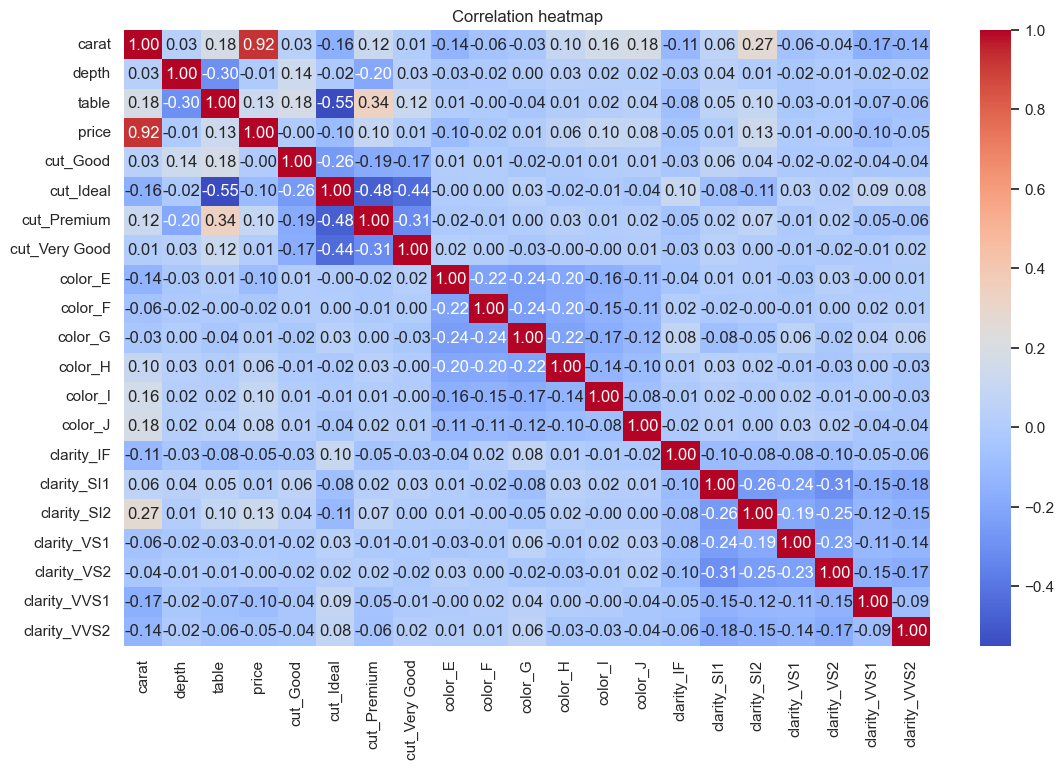

In [889]:
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(13,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt="0.2f")
plt.title("Correlation heatmap")
plt.show()

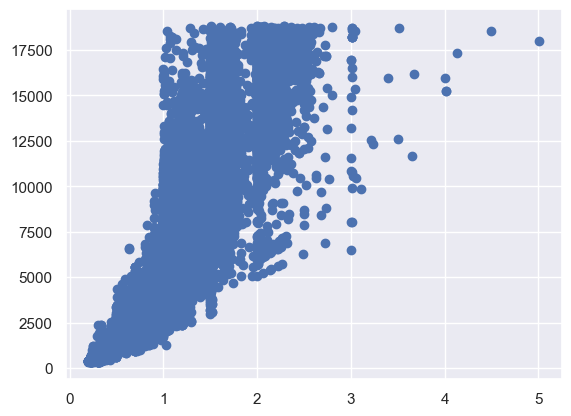

In [890]:
plt.scatter(df['carat'], df['price'])

In [891]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop('cut_Good', axis=1),
                                                    df_encoded['cut_Good'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((37758, 20), (16182, 20))

In [892]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [893]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

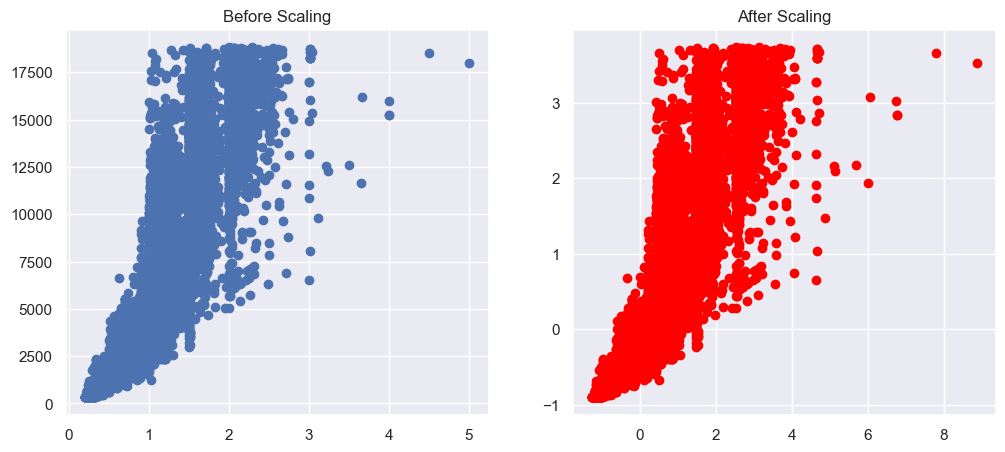

In [894]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['carat'], X_train['price'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['carat'], X_train_scaled['price'],color='red')
ax2.set_title("After Scaling")
plt.show()

In [895]:
df = pd.read_csv('./diamonds.csv',usecols=[0,1,7])
df.columns=['Class label', 'Carat', 'Price']
df

,Class label,Carat,Price
0,1,0.23,326
1,2,0.21,326
2,3,0.23,327
3,4,0.29,334
4,5,0.31,335
...,...,...,...
53935,53936,0.72,2757
53936,53937,0.72,2757
53937,53938,0.70,2757
53938,53939,0.86,2757


<Axes: xlabel='Carat', ylabel='Density'>

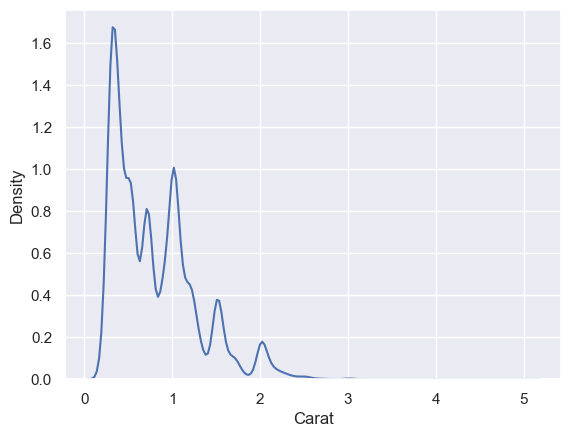

In [896]:
sns.kdeplot(df['Carat'])

<Axes: xlabel='Price', ylabel='Density'>

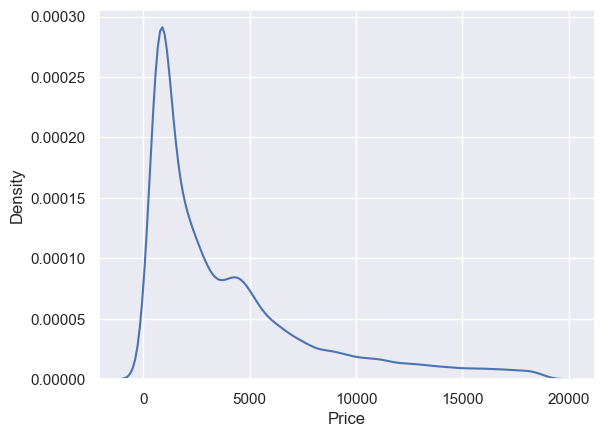

In [897]:
sns.kdeplot(df['Price'])

<Axes: xlabel='Carat', ylabel='Price'>

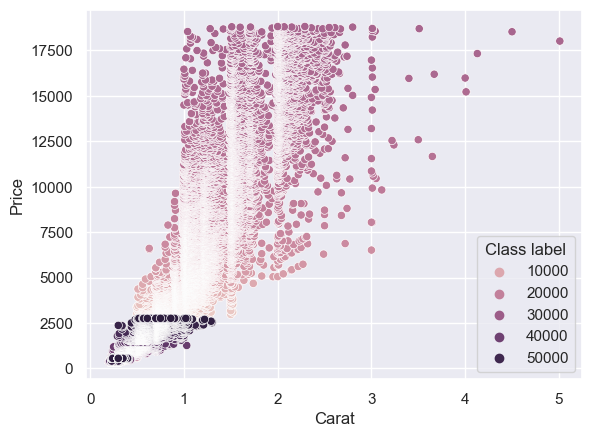

In [898]:
color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(x='Carat',y='Price',data=df, hue=df['Class label'])

In [899]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),
                                                    df['Class label'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((37758, 2), (16182, 2))

In [900]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [901]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [902]:
np.round(X_train.describe(), 1)

,Carat,Price
count,37758.0,37758.0
mean,0.8,3932.9
std,0.5,3989.0
min,0.2,327.0
25%,0.4,952.0
50%,0.7,2396.5
75%,1.0,5335.0
max,5.0,18823.0


In [903]:
np.round(X_train_scaled.describe(), 1)

,Carat,Price
count,37758.0,37758.0
mean,0.1,0.2
std,0.1,0.2
min,0.0,0.0
25%,0.0,0.0
50%,0.1,0.1
75%,0.2,0.3
max,1.0,1.0


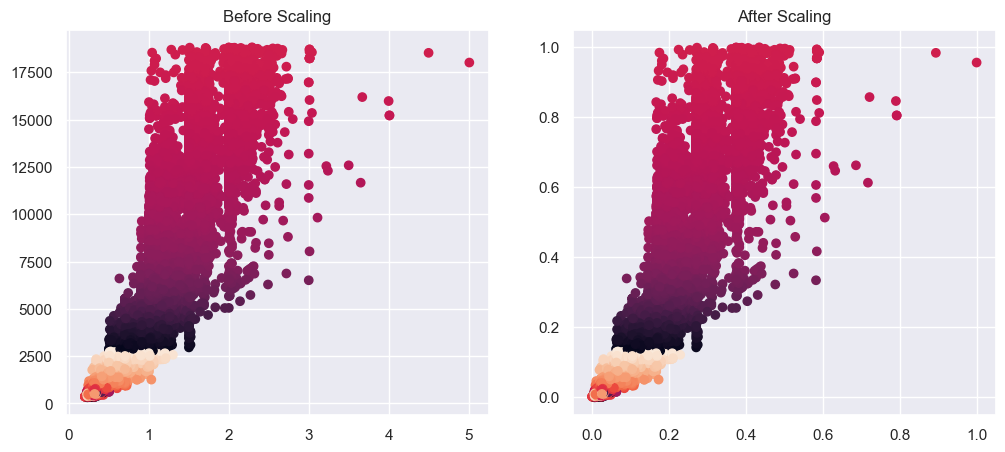

In [904]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Carat'], X_train['Price'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Carat'], X_train_scaled['Price'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

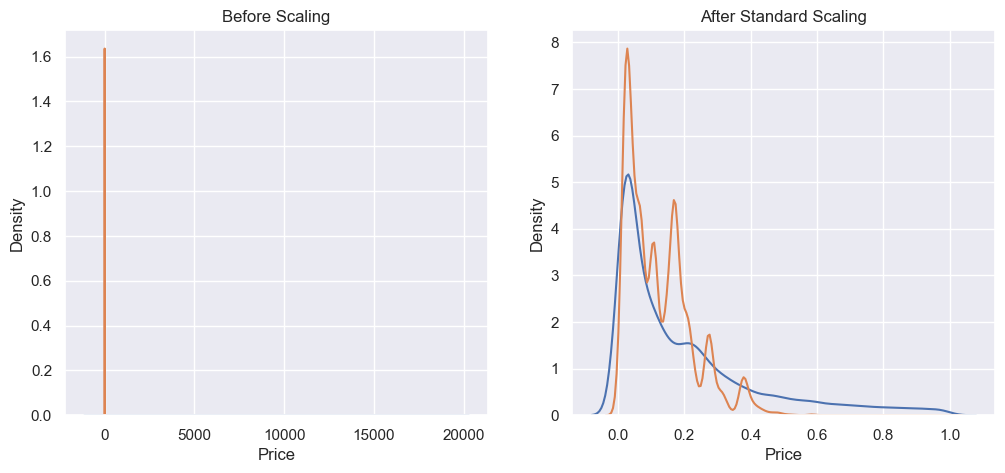

In [905]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Price'], ax=ax1)
sns.kdeplot(X_train['Carat'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Price'], ax=ax2)
sns.kdeplot(X_train_scaled['Carat'], ax=ax2)
plt.show()

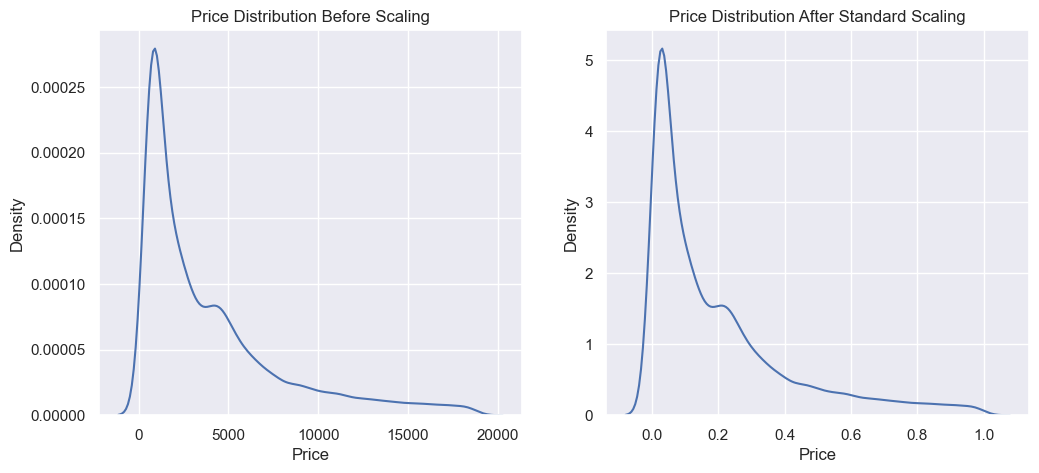

In [906]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Price Distribution Before Scaling')
sns.kdeplot(X_train['Price'], ax=ax1)

# after scaling
ax2.set_title('Price Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Price'], ax=ax2)
plt.show()

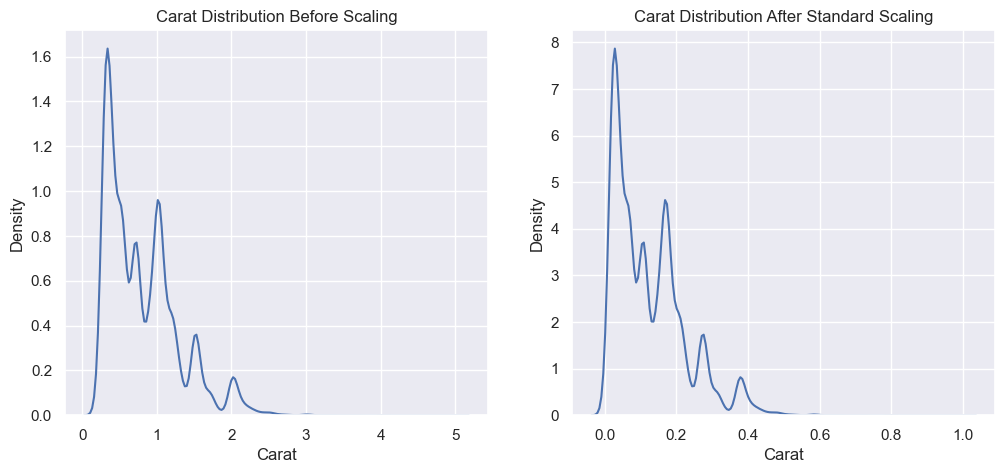

In [907]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Carat Distribution Before Scaling')
sns.kdeplot(X_train['Carat'], ax=ax1)

# after scaling
ax2.set_title('Carat Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Carat'], ax=ax2)
plt.show()

Handling the outliers

In [908]:
df = pd.read_csv('./diamonds.csv')
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


C:\Users\adity\AppData\Local\Temp\ipykernel_13492\3674365284.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carat'])
C:\Users\adity\AppData\Local\Temp\ipykernel_13492\3674365284.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


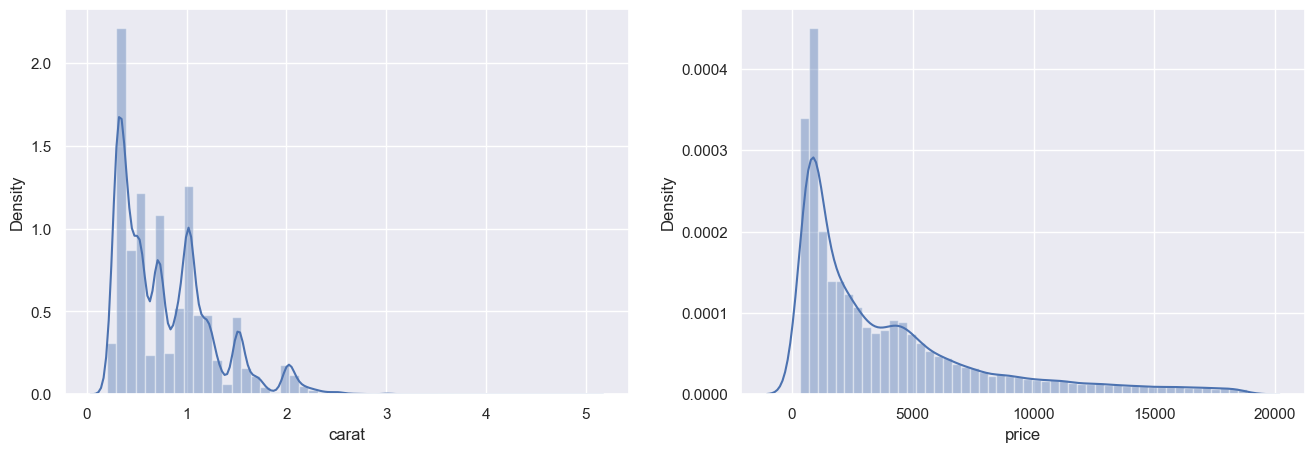

In [909]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['carat'])

plt.subplot(1,2,2)
sns.distplot(df['price'])

plt.show()

In [910]:
df['price'].skew()

1.618395283383529

<Axes: >

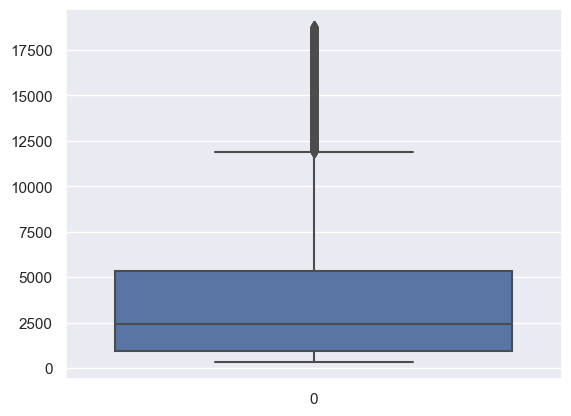

In [911]:
sns.boxplot(df['price'])

In [912]:
print("Mean value of carat",df['carat'].mean())
print("Std value of carat",df['carat'].std())
print("Min value of carat",df['carat'].min())
print("Max value of carat",df['carat'].max())

Mean value of carat 0.7979397478680014
Std value of carat 0.4740112444054184
Min value of carat 0.2
Max value of carat 5.01


In [913]:
# Finding the boundary values
print("Highest allowed",df['carat'].mean() + 3*df['carat'].std())
print("Lowest allowed",df['carat'].mean() - 3*df['carat'].std())

Highest allowed 2.2199734810842564
Lowest allowed -0.6240939853482538


In [914]:
# Finding the outliers
df[(df['carat'] > 2.21) | (df['carat'] < -0.62)]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
13757,13758,2.22,Fair,J,I1,66.7,56.0,5607,8.04,8.02,5.36
14138,14139,2.27,Fair,J,I1,67.6,55.0,5733,8.05,8.00,5.43
15684,15685,2.49,Fair,J,I1,66.3,58.0,6289,8.26,8.18,5.45
16283,16284,3.00,Very Good,H,I1,63.1,55.0,6512,9.23,9.10,5.77
16439,16440,2.22,Fair,H,I1,70.1,55.0,6564,7.77,7.74,5.44
...,...,...,...,...,...,...,...,...,...,...,...
27727,27728,2.61,Ideal,I,SI2,62.1,56.0,18756,8.85,8.73,5.46
27731,27732,2.55,Premium,I,VS1,61.8,62.0,18766,8.70,8.65,5.36
27739,27740,2.80,Good,G,SI2,63.8,58.0,18788,8.90,8.85,0.00
27744,27745,2.29,Premium,I,SI1,61.8,59.0,18797,8.52,8.45,5.24


In [915]:
# Trimming

new_df = df[(df['carat'] < 2.21) & (df['carat'] > -0.62)]
new_df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [916]:
# Approach 2

# Calculating the Zscore

df['carat_score'] = (df['carat'] - df['carat'].mean())/df['carat'].std()

In [917]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,carat_score
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,-1.198157
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,-1.240350
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,-1.198157
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,-1.071577
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,-1.029384


In [918]:
df[df['carat_score'] > 1]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,carat_score
1362,1363,1.50,Fair,H,I1,65.6,54.0,2964,7.26,7.09,4.70,1.481105
1997,1998,1.29,Good,I,I1,64.2,54.0,3098,6.93,6.83,4.42,1.038077
2024,2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28,1.523298
2025,2026,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28,1.523298
2366,2367,1.50,Fair,H,I1,69.3,61.0,3175,6.99,6.81,4.78,1.481105
...,...,...,...,...,...,...,...,...,...,...,...,...
27748,27749,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04,2.535932
27749,27750,2.29,Premium,I,VS2,60.8,60.0,18823,8.50,8.47,5.16,3.147732
52422,52423,1.30,Fair,H,I1,64.4,57.0,2512,6.93,6.86,4.44,1.059174
52805,52806,1.30,Fair,E,I1,66.5,58.0,2571,6.79,6.75,4.50,1.059174


In [919]:
df[df['carat_score'] < -1]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,carat_score
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,-1.198157
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,-1.240350
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,-1.198157
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,-1.071577
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,-1.029384
...,...,...,...,...,...,...,...,...,...,...,...,...
53635,53636,0.30,Ideal,I,VVS1,62.1,56.0,552,4.30,4.33,2.68,-1.050481
53636,53637,0.30,Ideal,D,SI1,61.6,57.0,552,4.28,4.32,2.65,-1.050481
53637,53638,0.30,Very Good,D,SI1,62.5,57.0,552,4.26,4.28,2.67,-1.050481
53638,53639,0.30,Ideal,D,SI1,61.0,57.0,552,4.29,4.33,2.63,-1.050481


In [920]:
df[(df['carat_score'] > 1) | (df['carat_score'] < -1)]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,carat_score
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,-1.198157
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,-1.240350
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,-1.198157
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,-1.071577
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,-1.029384
...,...,...,...,...,...,...,...,...,...,...,...,...
53635,53636,0.30,Ideal,I,VVS1,62.1,56.0,552,4.30,4.33,2.68,-1.050481
53636,53637,0.30,Ideal,D,SI1,61.6,57.0,552,4.28,4.32,2.65,-1.050481
53637,53638,0.30,Very Good,D,SI1,62.5,57.0,552,4.26,4.28,2.67,-1.050481
53638,53639,0.30,Ideal,D,SI1,61.0,57.0,552,4.29,4.33,2.63,-1.050481


In [921]:
# Trimming 
new_df = df[(df['carat_score'] < 1) & (df['carat_score'] > -1)]

In [922]:
new_df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,carat_score
39,40,0.33,Ideal,I,SI2,61.8,55.0,403,4.49,4.51,2.78,-0.987191
40,41,0.33,Ideal,I,SI2,61.2,56.0,403,4.49,4.50,2.75,-0.987191
41,42,0.33,Ideal,J,SI1,61.1,56.0,403,4.49,4.55,2.76,-0.987191
60,61,0.35,Ideal,I,VS1,60.9,57.0,552,4.54,4.59,2.78,-0.944998
64,65,0.42,Premium,I,SI2,61.5,59.0,552,4.78,4.84,2.96,-0.797322
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,-0.164426
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,-0.164426
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,-0.206619
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,0.130926


In [923]:
percentile25 = df['price'].quantile(0.25)
percentile75 = df['price'].quantile(0.75)

In [924]:
iqr = percentile75 - percentile25

In [925]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [926]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 11885.625
Lower limit -5611.375


In [927]:
#find the outliers
df[df['price'] > upper_limit]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,carat_score
23820,23821,1.17,Ideal,F,VVS1,62.1,57.0,11886,6.82,6.73,4.21,0.784919
23821,23822,2.08,Ideal,I,SI2,62.0,56.0,11886,8.21,8.10,5.06,2.704704
23822,23823,1.70,Premium,I,VS2,62.2,58.0,11888,7.65,7.60,4.74,1.903036
23823,23824,1.09,Ideal,F,IF,61.6,55.0,11888,6.59,6.65,4.08,0.616146
23824,23825,1.68,Ideal,E,SI2,60.4,55.0,11888,7.79,7.70,4.68,1.860842
...,...,...,...,...,...,...,...,...,...,...,...,...
27745,27746,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01,2.535932
27746,27747,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11,2.683608
27747,27748,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56,1.502201
27748,27749,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04,2.535932


In [928]:
df[df['price'] < lower_limit]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,carat_score


In [929]:
new_df = df[df['price'] < upper_limit]

C:\Users\adity\AppData\Local\Temp\ipykernel_13492\779654322.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


C:\Users\adity\AppData\Local\Temp\ipykernel_13492\779654322.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['price'])


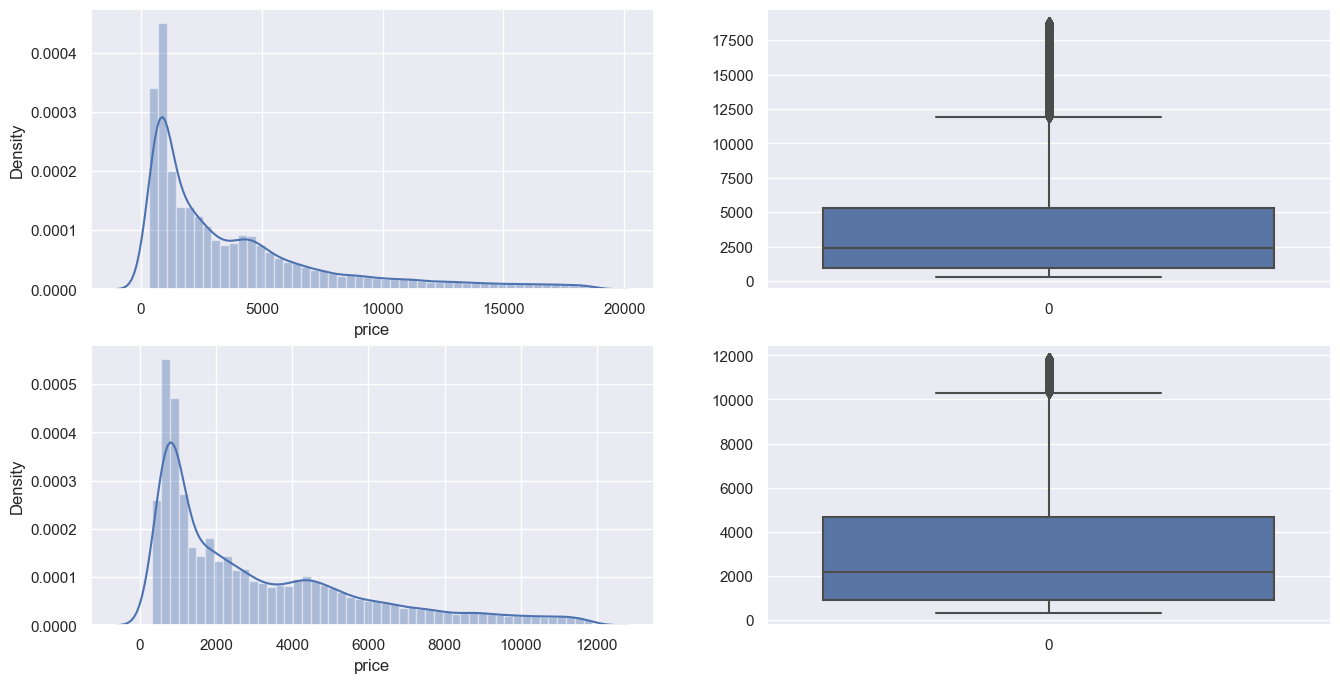

In [930]:
# compare them 

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['price'])

plt.subplot(2,2,2)
sns.boxplot(df['price'])

plt.subplot(2,2,3)
sns.distplot(new_df['price'])

plt.subplot(2,2,4)
sns.boxplot(new_df['price'])

plt.show()

In [931]:
new_df_cap = df.copy()

new_df_cap['price'] = np.where(
    new_df_cap['price'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['price'] < lower_limit,
        lower_limit,
        new_df_cap['price']
    )
)

C:\Users\adity\AppData\Local\Temp\ipykernel_13492\1461669885.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])
C:\Users\adity\AppData\Local\Temp\ipykernel_13492\1461669885.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['price'])


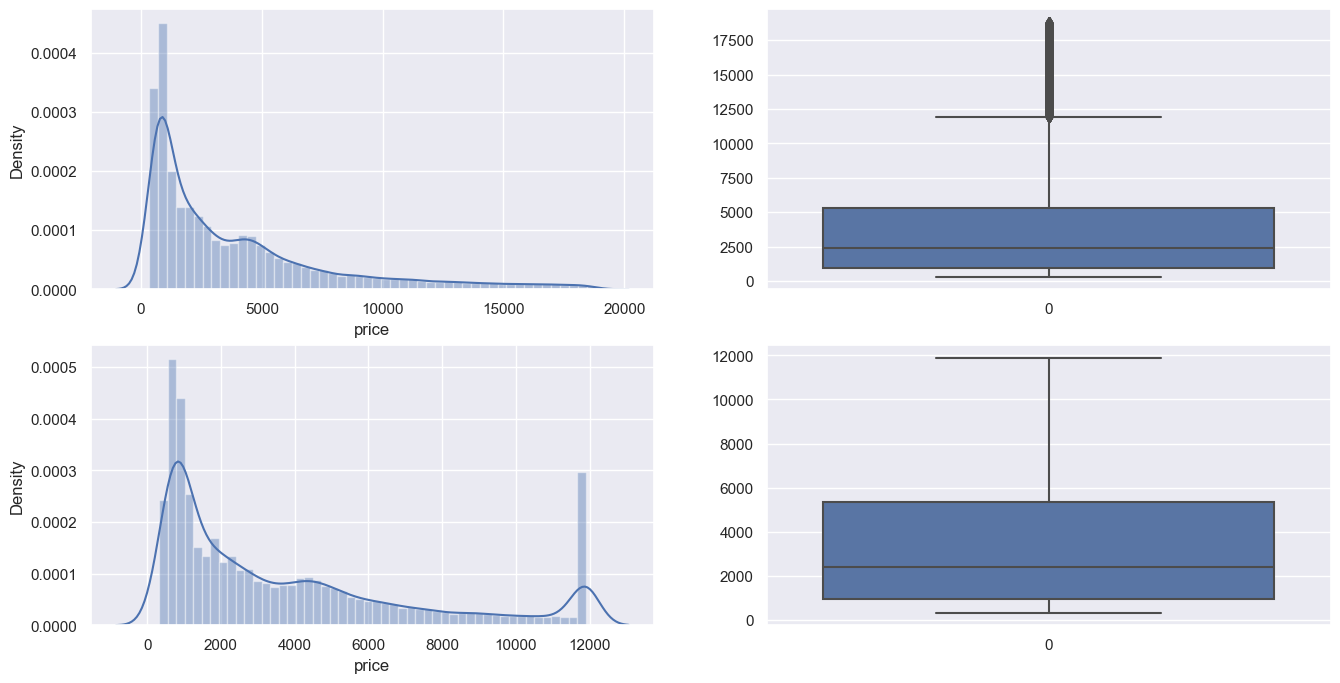

In [932]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['price'])

plt.subplot(2,2,2)
sns.boxplot(df['price'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['price'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['price'])

plt.show()

EDA - Removing the unnecessary part of the dataset which will hinder the accuracy and conclusions of our model
we need to remove the redundancies
EDA helps in identifying the faulty points

In [933]:
data = pd.read_csv('./diamonds.csv')
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [934]:
data1 = data.drop(['Unnamed: 0', 'clarity', 'table', 'x', 'y', 'z','cut', 'color'], axis=1)

In [935]:
data1

,carat,depth,price
0,0.23,61.5,326
1,0.21,59.8,326
2,0.23,56.9,327
3,0.29,62.4,334
4,0.31,63.3,335
...,...,...,...
53935,0.72,60.8,2757
53936,0.72,63.1,2757
53937,0.70,62.8,2757
53938,0.86,61.0,2757


relationship analysis

<Axes: xlabel='color'>

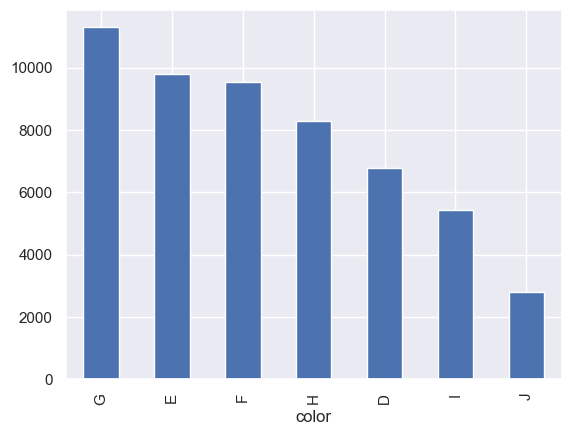

In [937]:
df['color'].value_counts().plot(kind='bar')

scatterplot works between two vairables

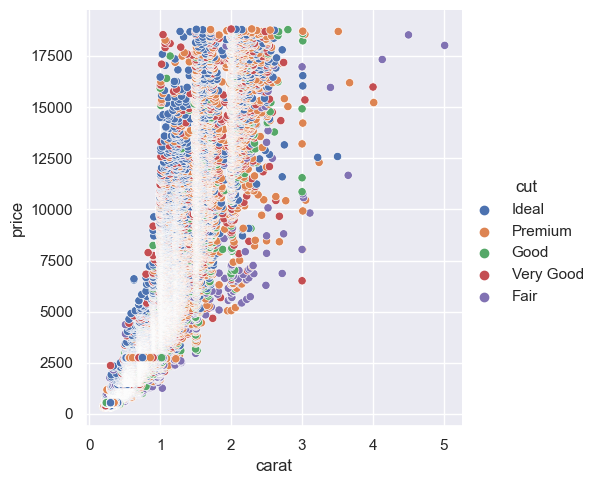

In [939]:
sns.relplot(x = 'carat', y='price', hue='cut', data=df)

histogram for continuous sample data

C:\Users\adity\AppData\Local\Temp\ipykernel_13492\2414289261.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['price'])


<Axes: xlabel='price', ylabel='Density'>

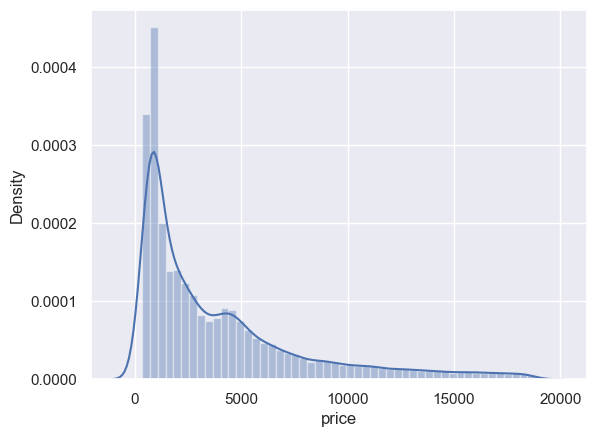

In [940]:
sns.distplot(data1['price'])

<Axes: ylabel='count'>

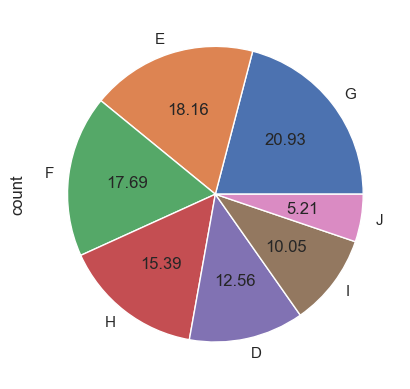

In [941]:
df['color'].value_counts().plot(kind='pie', autopct='%.2f')

<Axes: xlabel='carat', ylabel='price'>

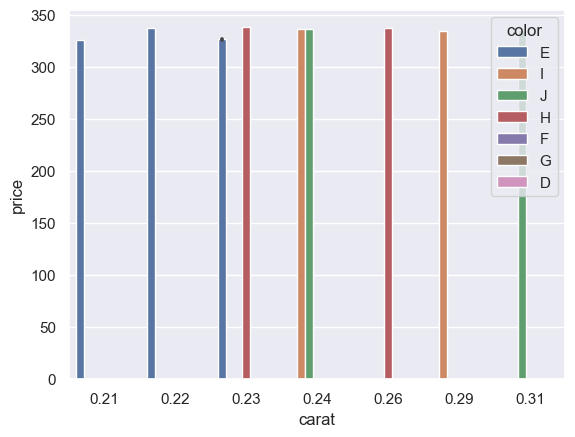

In [942]:
sns.barplot(x='carat', y='price', data=df.head(10), hue=df['color'])

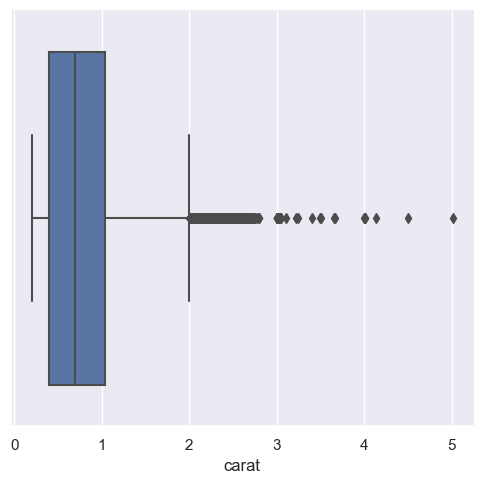

In [943]:
sns.catplot(x='carat', kind='box', data=data1)

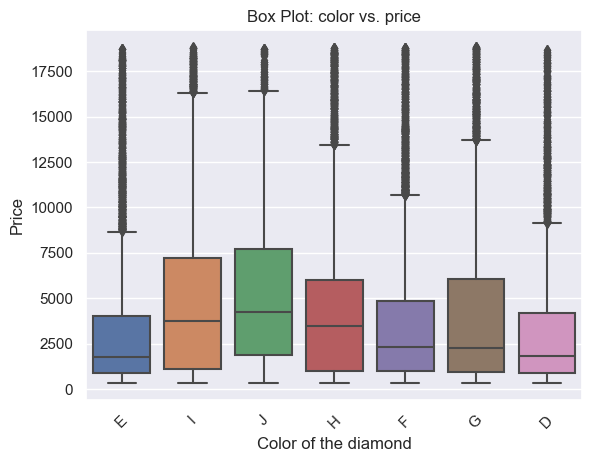

In [944]:
# sns.pairplot(df)
sns.boxplot(x='color', y='price', data=df)
plt.xlabel('Color of the diamond')
plt.ylabel('Price')
plt.title('Box Plot: color vs. price')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='carat', ylabel='price'>

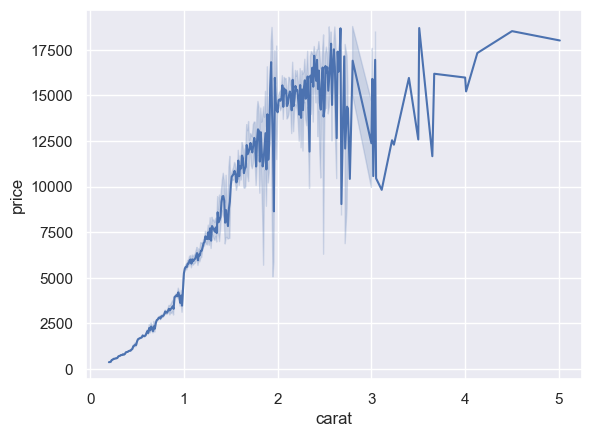

In [945]:
sns.lineplot(x = 'carat', y='price', data=data1)

Text(0.5, 1.0, 'Violin Plot: Price of the diamonds by Colors')

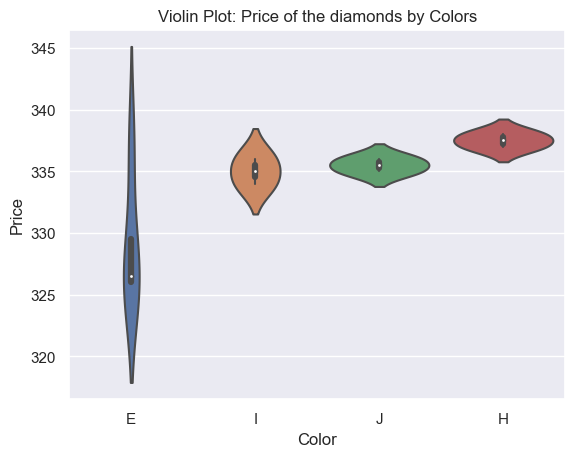

In [946]:
sns.violinplot(x='color', y='price', data=df.head(10))
plt.xlabel('Color')
plt.ylabel('Price')
plt.title('Violin Plot: Price of the diamonds by Colors')

In [947]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [948]:
diamonds = pd.read_csv('./diamonds.csv')
diamonds.drop(['Unnamed: 0', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], axis=1, inplace=True)


Text(0, 0.5, 'price')

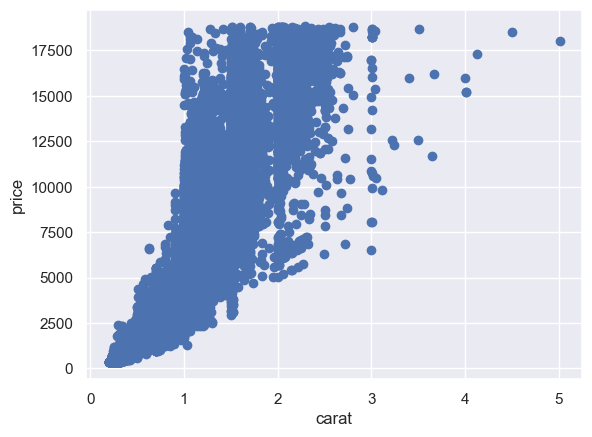

In [949]:
plt.scatter(diamonds.carat, diamonds.price)
plt.xlabel('carat')
plt.ylabel('price')

In [950]:
X = diamonds.iloc[:,:-1].values
y = diamonds.iloc[:,1].values

In [951]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [952]:
from sklearn.linear_model import LinearRegression
import xgboost as xgb


In [953]:
lr = LinearRegression()
xgbmodel = xgb.XGBRegressor()

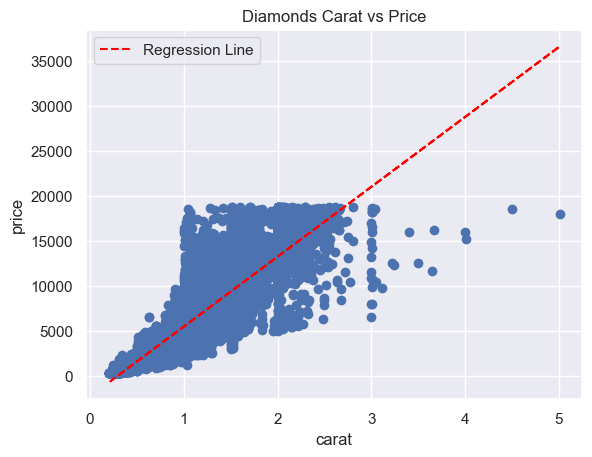

In [954]:
lr.fit(X_train,y_train)
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.predict(X_train,), color='red', linestyle='--', label='Regression Line')
plt.title('Diamonds Carat vs Price')
plt.xlabel('carat')
plt.ylabel('price')
plt.legend()

In [955]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score, accuracy_score

In [956]:
y_pred = lr.predict(X_test)
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 score",r2_score(y_test,y_pred))
SSE = np.sum((y_test - y_pred) ** 2)
SST = np.sum((y_test - np.mean(y_test)) ** 2)
print("SSE", SSE)
print("SST", SST)

MAE 1012.7667804782071
MSE 2401116.4433658714
RMSE 1549.5536271345602
R2 score 0.8482744833064001
SSE 25903244191.03102
SST 170724376199.29803


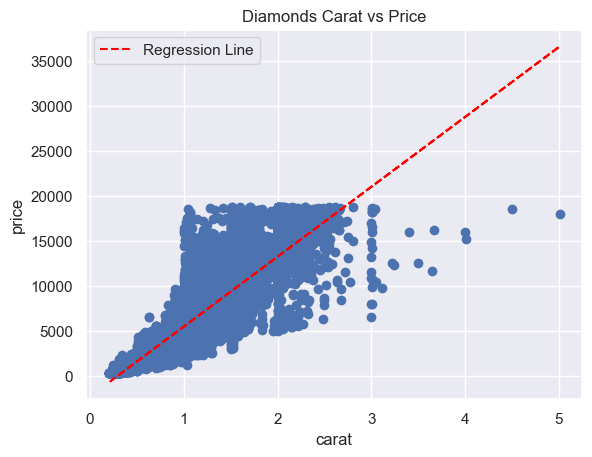

In [957]:
xgbmodel.fit(X_train,y_train)
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.predict(X_train,), color='red', linestyle='--', label='Regression Line')
plt.title('Diamonds Carat vs Price')
plt.xlabel('carat')
plt.ylabel('price')
plt.legend()

In [958]:
y_pred = xgbmodel.predict(X_test)
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 score",r2_score(y_test,y_pred))
SSE = np.sum((y_test - y_pred) ** 2)
SST = np.sum((y_test - np.mean(y_test)) ** 2)
print("SSE", SSE)
print("SST", SST)

MAE 815.2859360437106
MSE 2061705.072453211
RMSE 1435.863876714367
R2 score 0.8697217420454297
SSE 22241674321.62524
SST 170724376199.29803


In [959]:
new_df1 = diamonds.copy()
new_df1['random_feature'] = np.random.random(53940)

new_df1 = new_df1[['carat','random_feature','price']]
new_df1.head()

,carat,random_feature,price
0,0.23,0.551078,326
1,0.21,0.233727,326
2,0.23,0.493027,327
3,0.29,0.594077,334
4,0.31,0.393952,335


Text(0, 0.5, 'price')

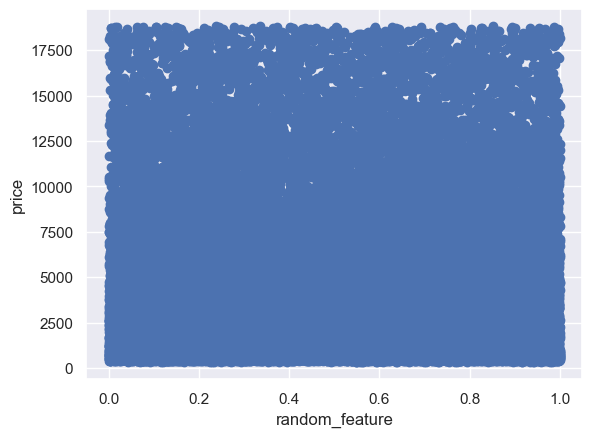

In [960]:
plt.scatter(new_df1['random_feature'], new_df1['price'])
plt.xlabel('random_feature')
plt.ylabel('price')

In [961]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [962]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [963]:
lr = LinearRegression()


In [964]:
lr.fit(X_train,y_train)

LinearRegression()

In [965]:
lr.fit(X_train,y_train)


LinearRegression()

In [966]:
y_pred = lr.predict(X_test)


In [967]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8483061284609508


In [968]:
new_df2 = diamonds.copy()

new_df2['size'] = new_df2['price'] + (np.random.randint(-50000,50000,53940)/10)

new_df2 = new_df2[['carat','size','price']]

In [969]:
new_df2.sample(5)


,carat,size,price
27427,2.11,22178.0,18034
20824,1.10,12187.4,9051
3554,0.74,6028.6,3416
6258,0.92,3272.9,4011
27874,0.30,3751.4,654


Text(0, 0.5, 'price')

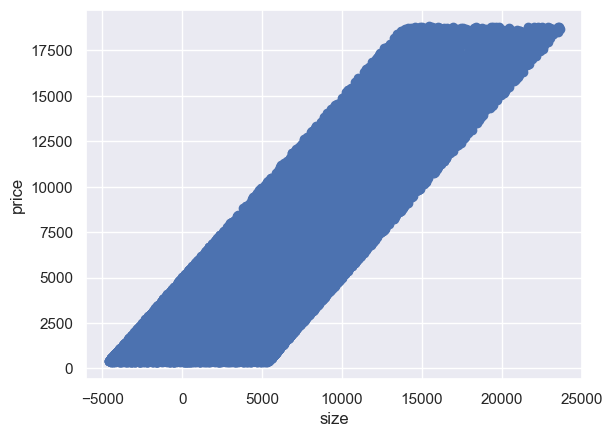

In [970]:
plt.scatter(new_df2['size'],new_df2['price'])
plt.xlabel('size')
plt.ylabel('price')

In [971]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred_bin = np.where(y_pred > 0, 1, 0)

confusion_matrix = confusion_matrix(y_test, y_pred_bin)

print(confusion_matrix)



[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


In [972]:
# print(data)
data1 = data.drop(['Unnamed: 0', 'clarity', 'table', 'x', 'y', 'z', 'color','cut'], axis=1)

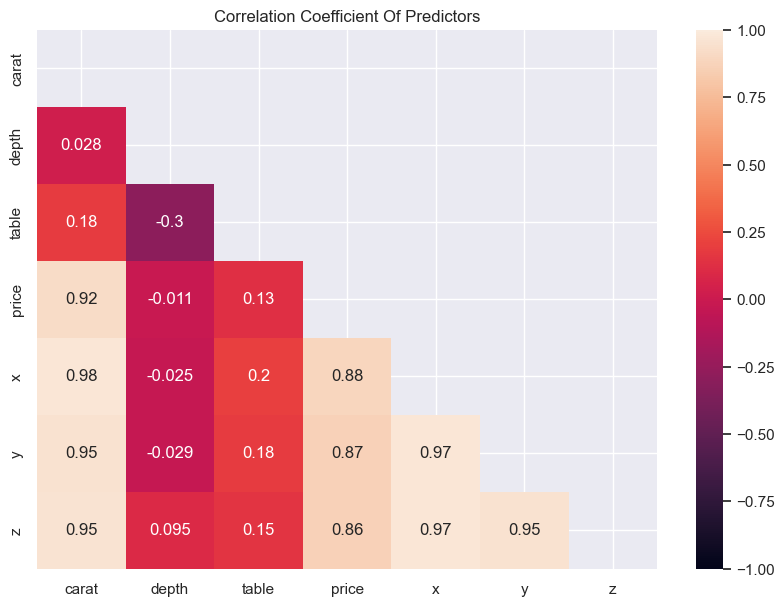

In [973]:
plt.figure(figsize=(10,7))
corr = df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']].corr()
# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# generate heatmap
sns.heatmap(corr, annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()
# sns.heatmap(corr, annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()